In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk # import nltk
nltk.download('stopwords') # Download the stopwords dataset
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [1]:
from google.colab import files
uploaded = files.upload()


Saving vaccination_all_tweets.csv to vaccination_all_tweets.csv


In [4]:
import pandas as pd

# Replace 'your_file.csv' with the actual filename of your uploaded CSV
df = pd.read_csv('vaccination_all_tweets.csv')


In [6]:
df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211184 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [8]:
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17023
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [9]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [10]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date','hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

text
0  Same folks said daikon paste could treat a cyt...
1  While the world has been on the wrong side of ...
2  #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3  Facts are immutable, Senator, even when you're...
4  Explain to me again why we need a vaccine @Bor...

In [11]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [12]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    228207 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [13]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
!pip install nltk
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

# Now you can apply the function to your DataFrame:
text_df.text = text_df['text'].apply(data_processing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
text_df = text_df.drop_duplicates('text')

In [19]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [21]:
text_df.head()

text
0  folks said daikon paste could treat cytokine s...
1  world wrong side history year hopefully bigges...
2  coronavirus sputnikv astrazeneca pfizerbiontec...
3  facts immutable senator even youre ethically s...
4  explain need vaccine borisjohnson matthancock ...

In [22]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [23]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211771 entries, 0 to 228206
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    211771 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB


In [24]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [25]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [26]:
text_df.head(10)

text  polarity
0  folks said daikon paste could treat cytokine s...     0.000
1  world wrong side history year hopefully bigges...    -0.500
2  coronavirus sputnikv astrazeneca pfizerbiontec...     0.000
3  facts immutable senator even youre ethically s...     0.100
4  explain need vaccine borisjohnson matthancock ...     0.000
5  anyone useful adviceguidance whether covid vac...     0.400
6  bit sad claim fame success vaccination patriot...    -0.100
7  many bright days 2020 best 1 bidenharris winni...     0.675
8  covid vaccine getting covidvaccine covid19 pfi...     0.000
9  covidvaccine states start getting covid19vacci...     0.000

In [27]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [28]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [29]:
text_df.head()

text  polarity sentiment
0  folks said daikon paste could treat cytokine s...       0.0   Neutral
1  world wrong side history year hopefully bigges...      -0.5  Negative
2  coronavirus sputnikv astrazeneca pfizerbiontec...       0.0   Neutral
3  facts immutable senator even youre ethically s...       0.1  Positive
4  explain need vaccine borisjohnson matthancock ...       0.0   Neutral

<Axes: xlabel='sentiment', ylabel='count'>

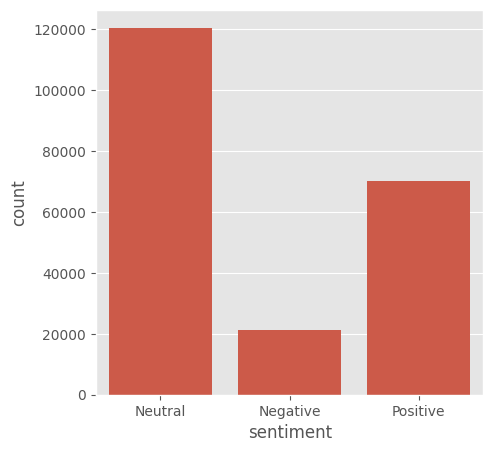

In [30]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x= 'sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of Sentiments')

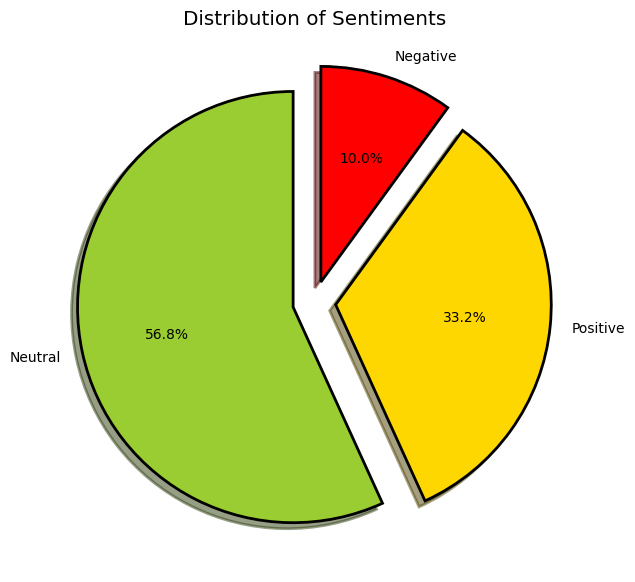

In [31]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of Sentiments')

In [32]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

text  polarity sentiment
186294  jimcramer ocgn squeeze soon ho approval covaxi...       1.0  Positive
171520  amelscript ho govcanhealth us_fda cdcgov needs...       1.0  Positive
171516  cdcgov cdcmmwr ho govcanhealth us_fda cdcgov n...       1.0  Positive
171517  nytimes ho govcanhealth us_fda cdcgov needs ap...       1.0  Positive
222829  rhesus macaque monkeys believed best nonhuman ...       1.0  Positive

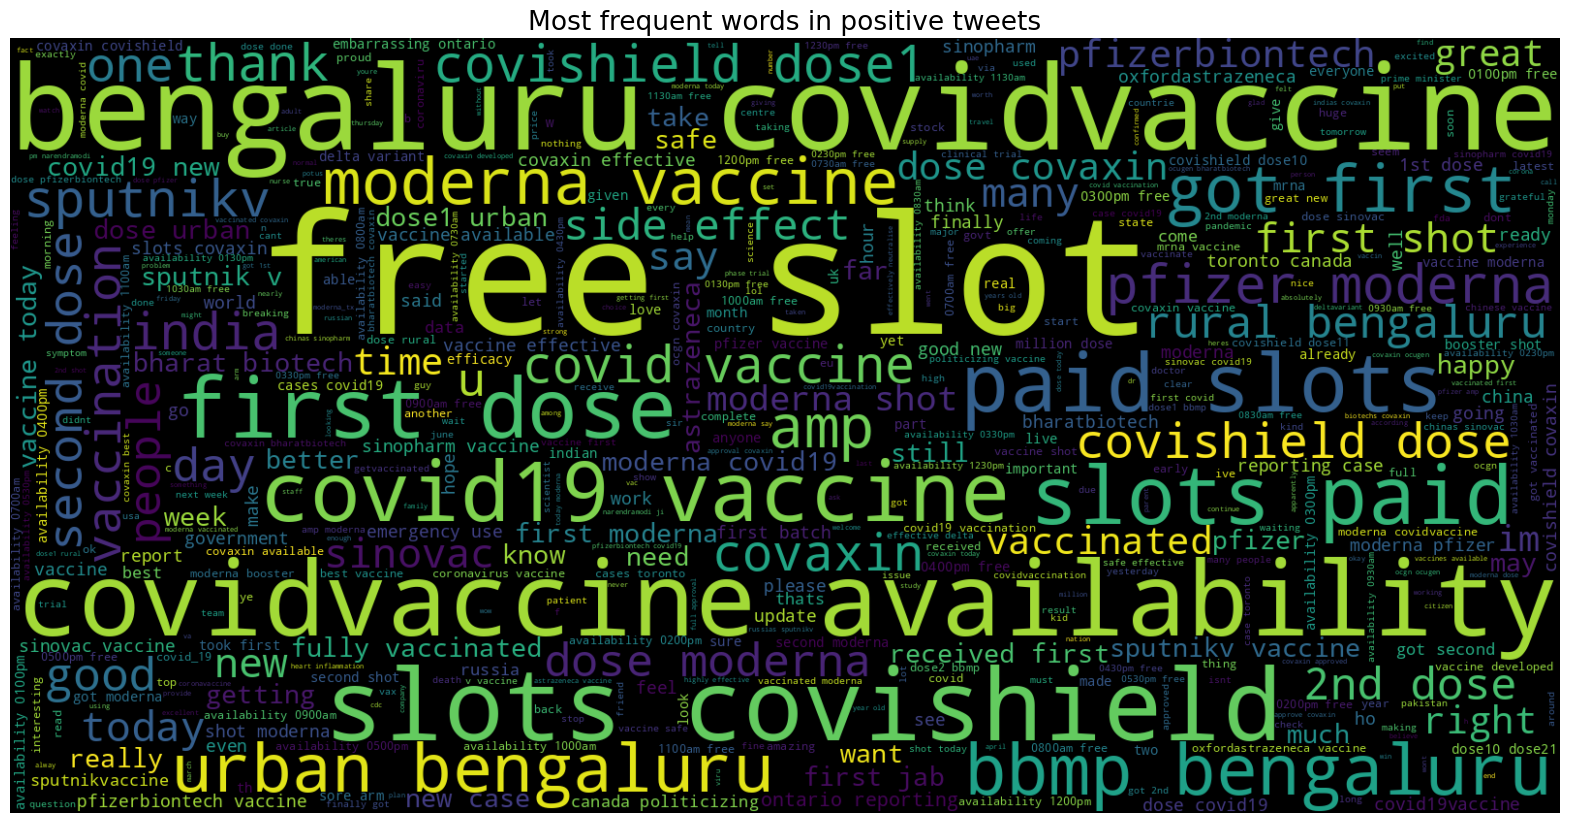

In [33]:
text= ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [34]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

text      polarity  \
61880   woke around 1 sweaty fever broken pretty much ... -6.938894e-18   
53579   grannygail31 congrats gg first dose moderna tu... -9.251859e-18   
128724  double dosed ass currently kicked tired bit wo... -1.110223e-17   
83234   zombie translating pziser blue zombie basic sl... -1.110223e-17   
220222  oh man moderna youre looking good article im s... -1.850372e-17   

       sentiment  
61880   Negative  
53579   Negative  
128724  Negative  
83234   Negative  
220222  Negative

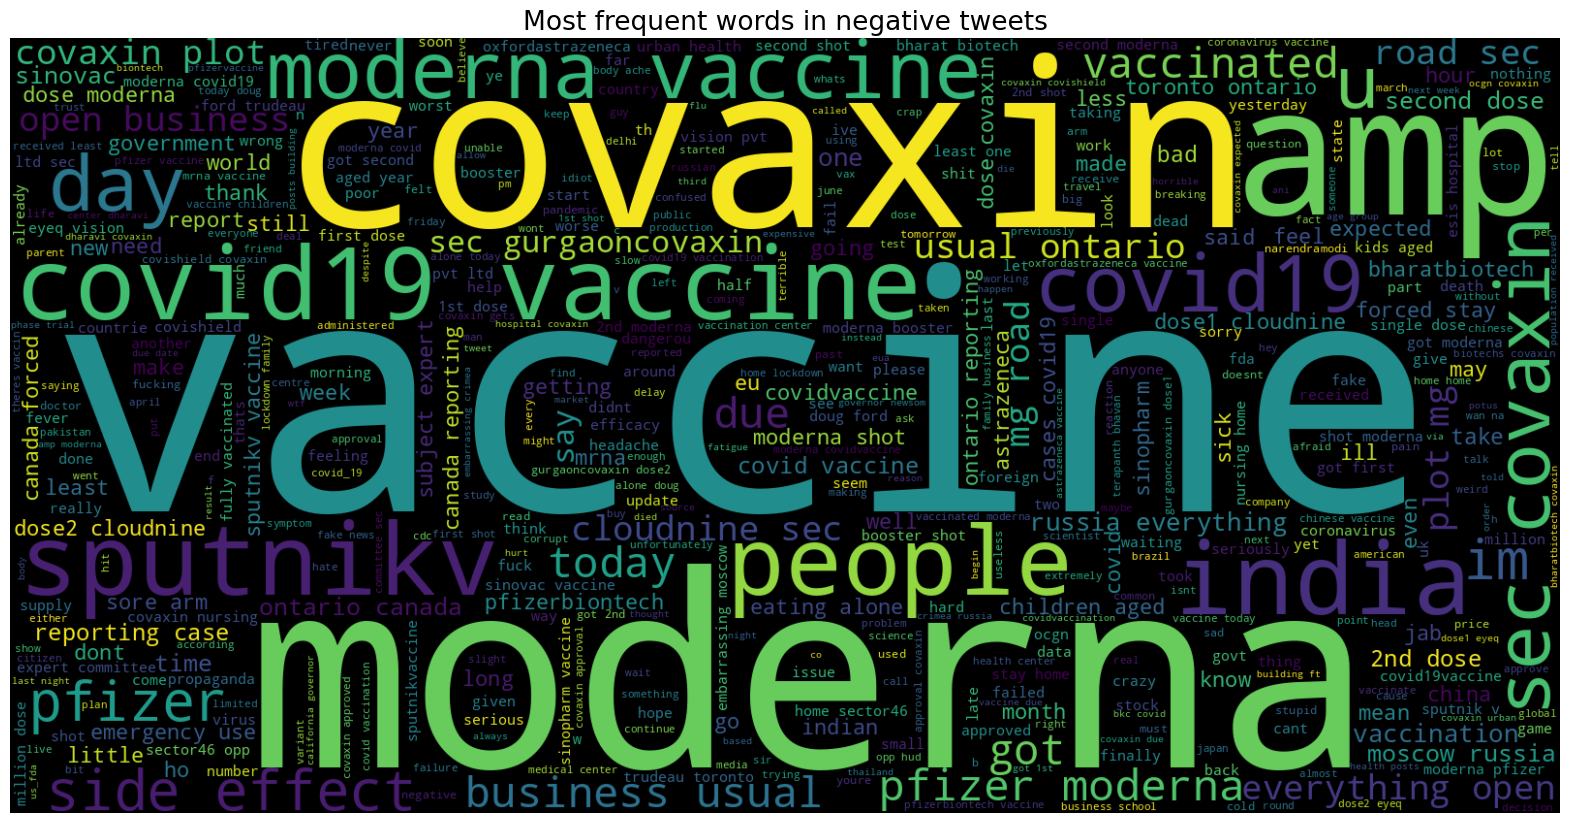

In [35]:
text= ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [36]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

text  polarity sentiment
0       folks said daikon paste could treat cytokine s...       0.0   Neutral
151502  000059 411007 06082021 187 dose2 pmc p apollo ...       0.0   Neutral
151516  000005 411014 07082021 118 dose2 pmc p apollo ...       0.0   Neutral
151515  000006 400602 07082021 292 dose1 tmc p highway...       0.0   Neutral
151514  000007 400602 07082021 172 dose2 tmc p highway...       0.0   Neutral

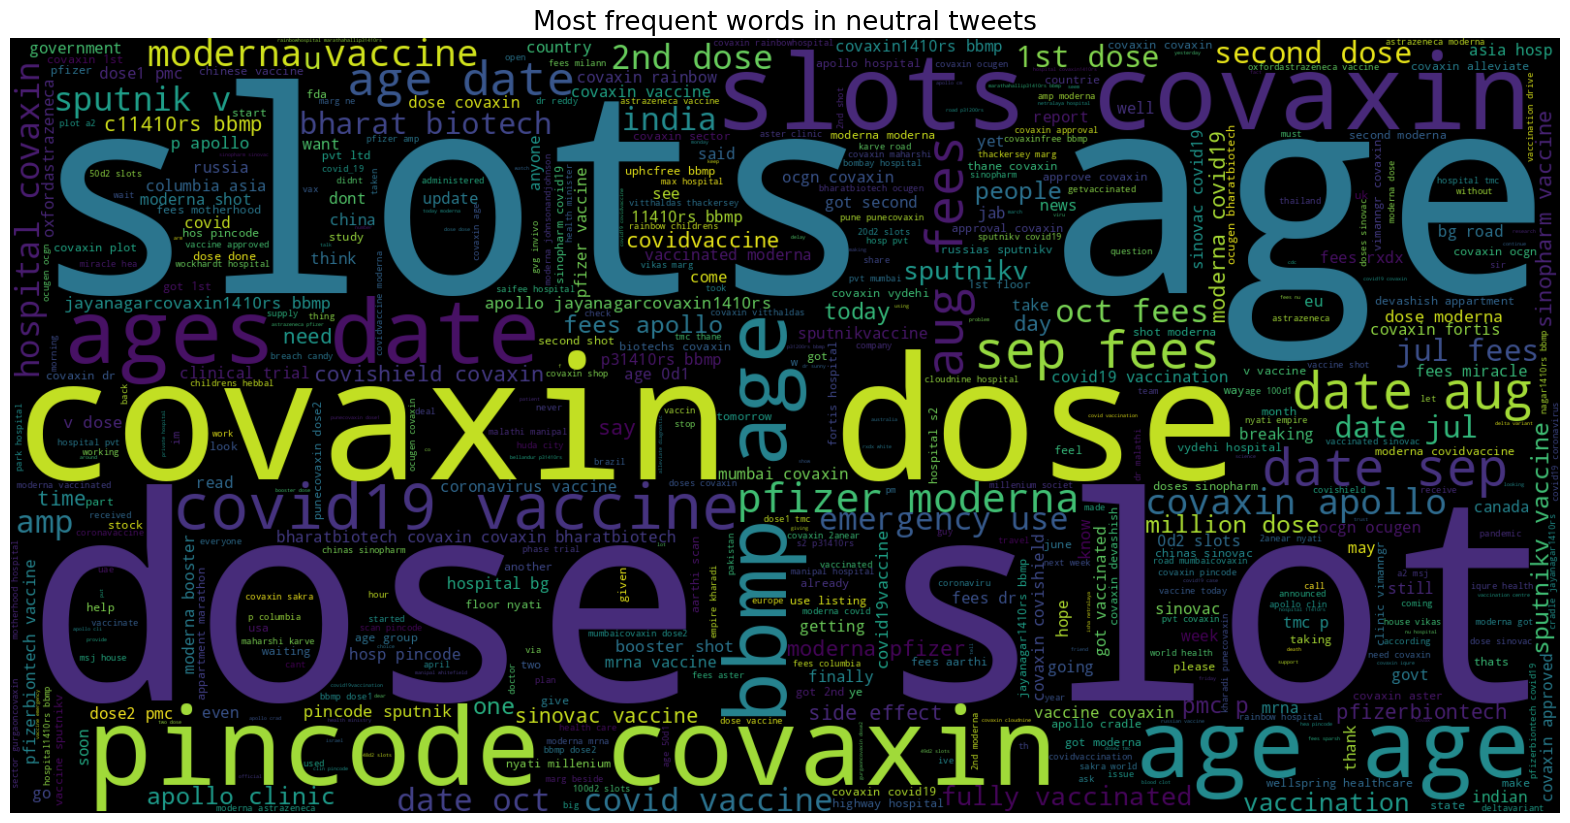

In [37]:
text= ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [38]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [39]:
feature_name = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_name)))
print("First 20 features:\n {}".format(feature_name[:20]))

Number of features: 897583

First 20 features:
 ['00' '00 doses' '000' '000 00' '000 000the' '000 717' '000 belgium'
 '000 covid19' '000 deaths' '000 donated' '000 dose' '000 doses'
 '000 first' '000 half' '000 health' '000 initial' '000 people'
 '000 purchased' '000 sha' '000 share']


In [40]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (169416, 897583)
Size of y_train: (169416,)
Size of x_test: (42355, 897583)
Size of y_test: (42355,)


In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 96.66%


In [45]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 3589   446   268]
 [   29 23977    75]
 [  150   445 13376]]


              precision    recall  f1-score   support

    Negative       0.95      0.83      0.89      4303
     Neutral       0.96      1.00      0.98     24081
    Positive       0.97      0.96      0.97     13971

    accuracy                           0.97     42355
   macro avg       0.96      0.93      0.95     42355
weighted avg       0.97      0.97      0.97     42355



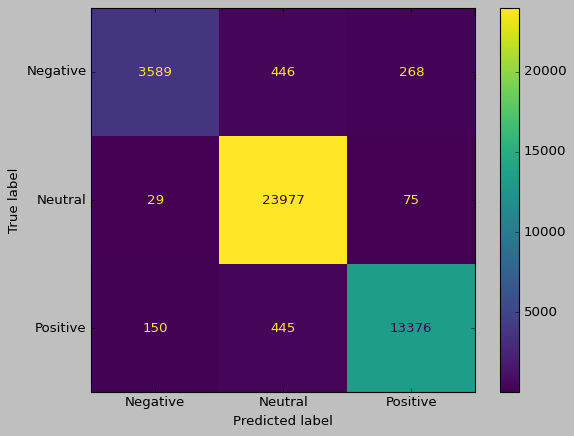

In [46]:
style.use('classic')
cm= confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [47]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=3)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [59]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [60]:
y_pred = grid.predict(x_test)

In [61]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 97.17%


In [62]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 3715   369   219]
 [   29 23978    74]
 [  154   355 13462]]


              precision    recall  f1-score   support

    Negative       0.95      0.86      0.91      4303
     Neutral       0.97      1.00      0.98     24081
    Positive       0.98      0.96      0.97     13971

    accuracy                           0.97     42355
   macro avg       0.97      0.94      0.95     42355
weighted avg       0.97      0.97      0.97     42355



In [63]:
from sklearn.svm import LinearSVC

In [64]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [65]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 97.85%


In [66]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 3855   224   224]
 [   30 23978    73]
 [  136   222 13613]]


              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      4303
     Neutral       0.98      1.00      0.99     24081
    Positive       0.98      0.97      0.98     13971

    accuracy                           0.98     42355
   macro avg       0.97      0.96      0.96     42355
weighted avg       0.98      0.98      0.98     42355



In [67]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear", "poly", "rbf", "sigmoid"],
    'gamma':[0.01, 1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [68]:
print("Best Parameter:", grid.best_params_)

Best Parameter: {'C': 10}


In [69]:
y_pred = grid.predict(x_test)

In [70]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 97.90%


In [71]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 3866   216   221]
 [   28 23978    75]
 [  136   212 13623]]


              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      4303
     Neutral       0.98      1.00      0.99     24081
    Positive       0.98      0.98      0.98     13971

    accuracy                           0.98     42355
   macro avg       0.97      0.96      0.96     42355
weighted avg       0.98      0.98      0.98     42355

